In [0]:
import os
import numpy as np
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from keras.optimizers import SGD, Adam, RMSprop

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping,TensorBoard,ModelCheckpoint


import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
data = pd.read_csv("https://raw.githubusercontent.com/AttilaDSA/IntilaqDSAcademy/master/Deep%20Learning%20Labs/Lab%20Logistic%20Regression/email.csv",index_col=0)

In [4]:
data.head()

,spam,to_multiple,from,cc,sent_email,image,attach,dollar,winner,inherit,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number
1,0,no,yes,no,no,no,no,no,no,no,no,11.370,202,HTML,no,no,no,0,big
2,0,no,yes,no,no,no,no,no,no,no,no,10.504,202,HTML,no,no,no,1,small
3,0,no,yes,no,no,no,no,yes,no,yes,no,7.773,192,HTML,no,no,no,6,small
4,0,no,yes,no,no,no,no,no,no,no,no,13.256,255,HTML,no,no,no,48,small
5,0,no,yes,no,no,no,no,no,no,no,yes,1.231,29,Plain,no,no,no,1,none


In [0]:
data = data.replace('no', 0)
data = data.replace('yes', 1)
data = data.replace('HTML', 1)
data = data.replace('Plain', 0)
data = data.replace('big', 2)
data = data.replace('small', 1)
data = data.replace('none', 0)

In [0]:
df = pd.DataFrame(data)

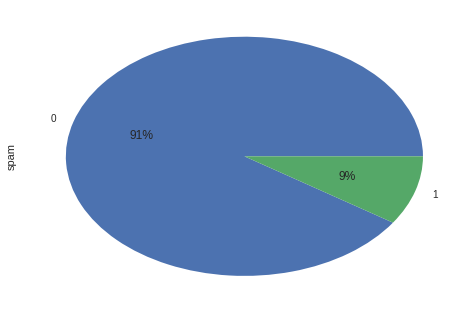

In [7]:
df.spam.value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.show()

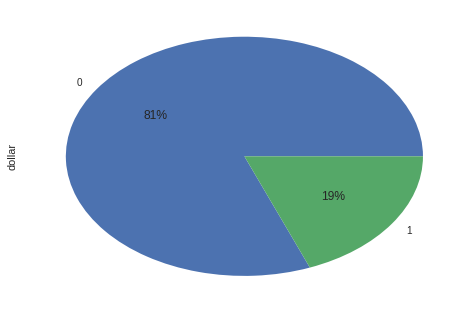

In [8]:
df.dollar.value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.show()

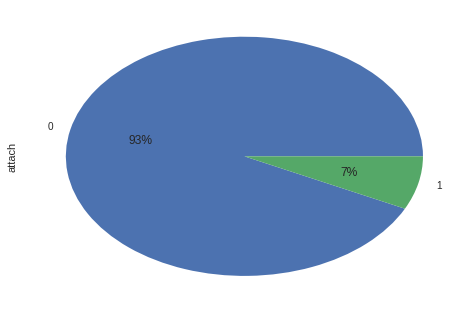

In [9]:
df.attach.value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.show()

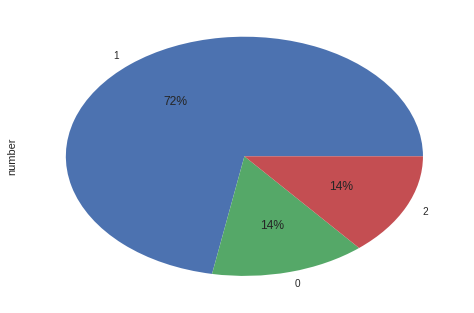

In [10]:
df.number.value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.show()

In [11]:
y=data['spam']
y.head()

1    0
2    0
3    0
4    0
5    0
Name: spam, dtype: int64

In [12]:
x=data.copy()
del x['spam']
x = pd.get_dummies(x)
x.head()

,to_multiple,from,cc,sent_email,image,attach,dollar,winner,inherit,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number
1,0,1,0,0,0,0,0,0,0,0,11.370,202,1,0,0,0,0,2
2,0,1,0,0,0,0,0,0,0,0,10.504,202,1,0,0,0,1,1
3,0,1,0,0,0,0,1,0,1,0,7.773,192,1,0,0,0,6,1
4,0,1,0,0,0,0,0,0,0,0,13.256,255,1,0,0,0,48,1
5,0,1,0,0,0,0,0,0,0,1,1.231,29,0,0,0,0,1,0


In [13]:
x.dtypes

to_multiple       int64
from              int64
cc                int64
sent_email        int64
image             int64
attach            int64
dollar            int64
winner            int64
inherit           int64
password          int64
num_char        float64
line_breaks       int64
format            int64
re_subj           int64
exclaim_subj      int64
urgent_subj       int64
exclaim_mess      int64
number            int64
dtype: object

In [14]:
x.describe()

,to_multiple,from,cc,sent_email,image,attach,dollar,winner,inherit,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number
count,3921.000000,3921.000000,3921.000000,3921.000000,3921.000000,3921.000000,3921.000000,3921.000000,3921.000000,3921.000000,3921.000000,3921.000000,3921.000000,3921.000000,3921.000000,3921.000000,3921.000000,3921.000000
mean,0.158123,0.999235,0.123693,0.277990,0.028054,0.072175,0.190258,0.016322,0.032645,0.028564,10.706586,230.658505,0.695231,0.261413,0.080337,0.001785,6.584290,0.998980
std,0.364903,0.027654,0.329273,0.448066,0.165148,0.258811,0.392554,0.126728,0.177728,0.166599,14.645786,319.304959,0.460368,0.439460,0.271848,0.042220,51.479871,0.528281
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.459000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.856000,119.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.084000,298.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,190.087000,4022.000000,1.000000,1.000000,1.000000,1.000000,1236.000000,2.000000


In [0]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled)

In [0]:
x_scaled.columns=x.columns

In [17]:
x_scaled.head()

,to_multiple,from,cc,sent_email,image,attach,dollar,winner,inherit,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.059810,0.049988,1.0,0.0,0.0,0.0,0.000000,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.055254,0.049988,1.0,0.0,0.0,0.0,0.000809,0.5
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.040887,0.047501,1.0,0.0,0.0,0.0,0.004854,0.5
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.069732,0.063168,1.0,0.0,0.0,0.0,0.038835,0.5
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.006471,0.006963,0.0,0.0,0.0,0.0,0.000809,0.0


In [0]:
X = x_scaled

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

('x_train shape:', (2940, 18))
('x_test shape:', (981, 18))
('y_train shape:', (2940,))
('y_test shape:', (981,))


In [0]:
# batch_size = 4096
epochs = 100

optimizer = Adam(lr=1e-3, beta_1=0.9, beta_2=0.999, epsilon=1e-5, decay=0.0)
# optimizer = SGD(lr=1e-4, decay=0.0005, momentum=0.9)
# optimizer = RMSprop(lr=1e-5, rho=0.9, epsilon=1e-08, decay=0.0)

In [0]:
from keras.models import Model
from keras.layers import Input, Dense

model = Sequential()
model.add(Dense(8, input_dim=18, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer=optimizer ,
              metrics=['accuracy'])

# Summary
model.summary()

In [0]:
model_name='deepSpam'

checkpointer = ModelCheckpoint(
    filepath=os.path.join(model_name + '.hdf5'),
    monitor='loss', verbose=1, save_best_only=True, mode='min', period=1)

early_stop = EarlyStopping(monitor='loss', min_delta=0.001, patience=5, mode='min', verbose=1)

tensorboard = TensorBoard(log_dir='./Graph/'+model_name,
                          histogram_freq=1,
                          write_grads=True,
                          # batch_size=batch_size,
                          write_graph=True,
                          write_images=True)

In [23]:
history = model.fit(x_train, y_train,
                    # batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(x_test, y_test),
                    callbacks=[checkpointer, tensorboard])

Train on 2940 samples, validate on 981 samples
Epoch 1/100
2940/2940 [==============================] - 0s 93us/step - loss: 0.4862 - acc: 0.8224 - val_loss: 0.3450 - val_acc: 0.9123

Epoch 00001: loss improved from inf to 0.48622, saving model to deepSpam.hdf5
Epoch 2/100
2940/2940 [==============================] - 0s 50us/step - loss: 0.3153 - acc: 0.9017 - val_loss: 0.2730 - val_acc: 0.9164

Epoch 00002: loss improved from 0.48622 to 0.31534, saving model to deepSpam.hdf5
Epoch 3/100
2940/2940 [==============================] - 0s 51us/step - loss: 0.2817 - acc: 0.9031 - val_loss: 0.2547 - val_acc: 0.9164

Epoch 00003: loss improved from 0.31534 to 0.28166, saving model to deepSpam.hdf5
Epoch 4/100
2940/2940 [==============================] - 0s 50us/step - loss: 0.2715 - acc: 0.9031 - val_loss: 0.2472 - val_acc: 0.9164

Epoch 00004: loss improved from 0.28166 to 0.27147, saving model to deepSpam.hdf5
Epoch 5/100
2940/2940 [==============================] - 0s 50us/step - loss: 0.2

['acc', 'loss', 'val_acc', 'val_loss']


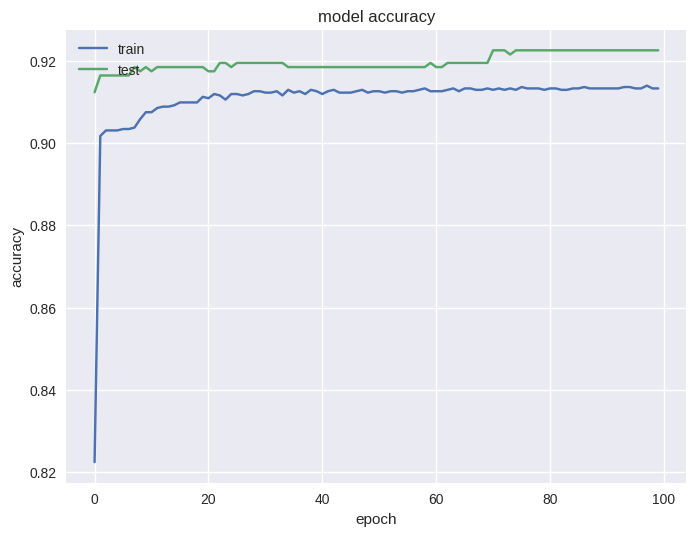

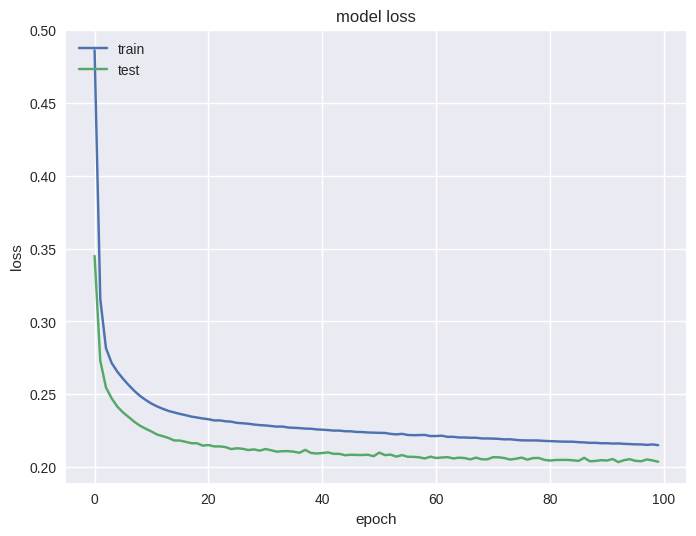

In [24]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.figure(figsize=(8, 6), dpi=100)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig(os.path.join('model accuracy 3.png'))
plt.show()
# summarize history for loss
plt.figure(figsize=(8, 6), dpi=100)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig(os.path.join('model loss 3.png'))
plt.show()

In [35]:
from sklearn.metrics import f1_score
y_pred=model.predict(x_test)
y_pred = (y_pred>0.5)
res = f1_score(y_test, y_pred, average='macro') 
print("F1 Score : %s" % res)

F1 Score : 0.6070208728652751


In [0]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
Normalized confusion matrix


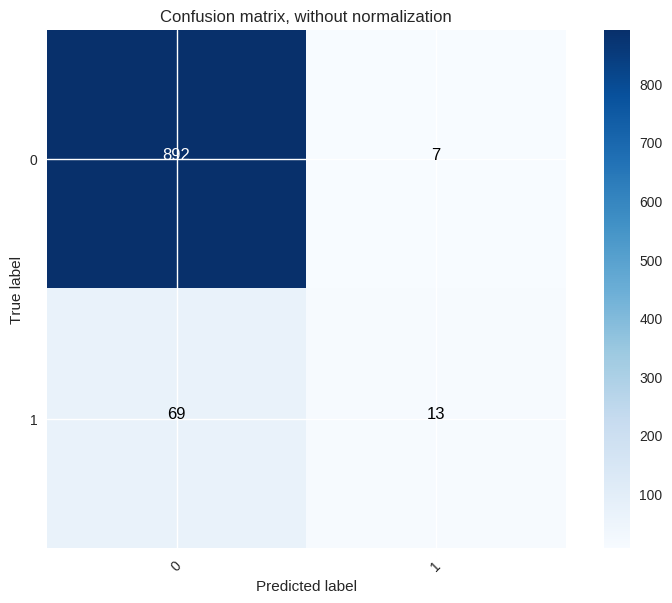

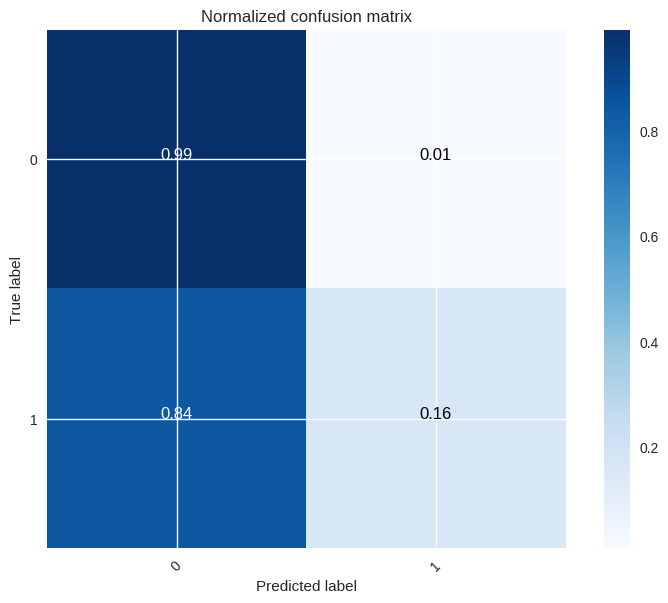

In [47]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(8, 6), dpi=100)
plot_confusion_matrix(cnf_matrix, classes=[0,1],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure(figsize=(8, 6), dpi=100)
plot_confusion_matrix(cnf_matrix, classes=[0,1], normalize=True,
                      title='Normalized confusion matrix')
plt.show()